In [1]:
%cd ..

/home/gianscarpe/dev/event-camera


In [261]:
from experimenting.dataset import DHP3DDataset, get_dataloader
from experimenting.dataset.indexes import get_dataset_params
from experimenting.utils import get_file_paths, decay_heatmap
from matplotlib import pyplot as plt
from os.path import join, basename
import numpy as np
from albumentations import Compose
from albumentations.pytorch import ToTensor
import torch

%matplotlib inline

In [262]:
# Augmentation
aug = Compose([ToTensor()])

In [263]:
data_dir = '/home/gianscarpe/dev/data/dhp19/time_count_dataset/movements_per_frame'
labels_dir = '/home/gianscarpe/dev/data/dhp19/time_count_dataset/labels'
file_paths, train_index, val_index, test_index, labels = get_dataset_params(data_dir)
file_paths = get_file_paths(data_dir, extensions=['.npy'])

LOADED INDEXES! train: 20267 	 val: 5067 	 test: 6334
.npy


In [264]:
d = DHP3DDataset(file_paths, labels_dir, train_index, transform=aug)
loader = get_dataloader(d, 32, 2)

In [265]:
def display(img):                                                               
        fig, ax = plt.subplots(ncols=img.shape[-1], nrows=1,                              
                               figsize=(20,20))                                                                                   
        for i in range(img.shape[-1]):                                                                
            ax[i].imshow(img[:, :, i])                                                  
            ax[i].axis('off')                                                             
        plt.show()

In [266]:
batch = next(iter(loader))                       

In [267]:
x, y = batch

In [270]:
x.shape

torch.Size([32, 1, 260, 346])

In [269]:
display(y[0].numpy())

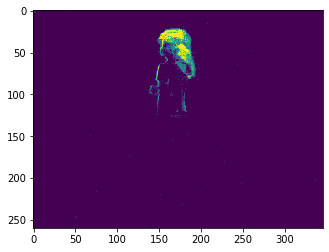

In [272]:
plt.imshow(torch.squeeze(x[0]))

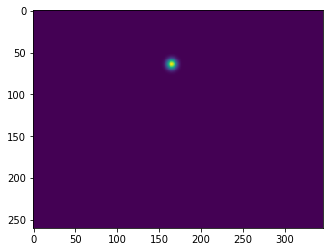

In [287]:
plt.imshow(y[0][1])